# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

#print check
print(weather_api_key)

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

8a8b879fdccad5749549882ac5e1a831


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 620


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units={units}"

    #print check
    print(city_url)

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # pprint(city_weather)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
https://api.openweathermap.org/data/2.5/weather?q=jamestown&appid=8a8b879fdccad5749549882ac5e1a831&units=metric
Processing Record 1 of Set 1 | jamestown
https://api.openweathermap.org/data/2.5/weather?q=castro&appid=8a8b879fdccad5749549882ac5e1a831&units=metric
Processing Record 2 of Set 1 | castro
https://api.openweathermap.org/data/2.5/weather?q=punta arenas&appid=8a8b879fdccad5749549882ac5e1a831&units=metric
Processing Record 3 of Set 1 | punta arenas
https://api.openweathermap.org/data/2.5/weather?q=urdzhar&appid=8a8b879fdccad5749549882ac5e1a831&units=metric
Processing Record 4 of Set 1 | urdzhar
City not found. Skipping...
https://api.openweathermap.org/data/2.5/weather?q=whitehorse&appid=8a8b879fdccad5749549882ac5e1a831&units=metric
Processing Record 5 of Set 1 | whitehorse
https://api.openweathermap.org/data/2.5/weather?q=flinders&appid=8a8b879fdccad5749549882ac5e1a831&units=metric
Processing Record 6 of Set 1 | flinders
htt

In [6]:
#Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

city_data_df.head()

# Show Record Count
city_data_df.count()

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,jamestown,42.0970,-79.2353,6.77,82,{'all': 75},2.68,US,1681728214
1,castro,-24.7911,-50.0119,18.56,95,{'all': 61},3.38,BR,1681728215
2,punta arenas,-53.1500,-70.9167,4.06,70,{'all': 100},5.66,CL,1681728215
3,whitehorse,60.7161,-135.0538,-1.57,86,{'all': 75},1.03,CA,1681728070
4,flinders,-34.5833,150.8552,15.66,78,{'all': 10},1.34,AU,1681728217


In [8]:

# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

city_data_df["Cloudiness"] = (city_data_df["Cloudiness"]).str.replace("{'all':", "")
city_data_df["Cloudiness"] = (city_data_df["Cloudiness"]).str.replace("}", "")
# Display sample data
city_data_df.head()

/var/folders/97/1pwhdmm972qflw4pgzzsqdwr0000gn/T/ipykernel_84260/3256076365.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  city_data_df["Cloudiness"] = (city_data_df["Cloudiness"]).str.replace("{'all':", "")
/var/folders/97/1pwhdmm972qflw4pgzzsqdwr0000gn/T/ipykernel_84260/3256076365.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  city_data_df["Cloudiness"] = (city_data_df["Cloudiness"]).str.replace("}", "")


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,jamestown,42.0970,-79.2353,6.77,82,75,2.68,US,1681728214
1,castro,-24.7911,-50.0119,18.56,95,61,3.38,BR,1681728215
2,punta arenas,-53.1500,-70.9167,4.06,70,100,5.66,CL,1681728215
3,whitehorse,60.7161,-135.0538,-1.57,86,75,1.03,CA,1681728070
4,flinders,-34.5833,150.8552,15.66,78,10,1.34,AU,1681728217


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

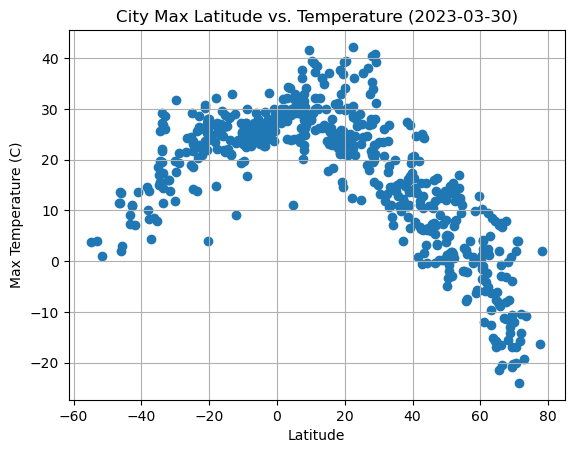

In [10]:
# Build scatter plot for latitude vs. temperature
xaxis = pd.to_numeric(city_data_df["Lat"].astype(float))
yaxis = pd.to_numeric(city_data_df["Max Temp"].astype(float))

xaxis = city_data_df["Lat"]
yaxis = city_data_df["Max Temp"]
plt.scatter(xaxis, yaxis)

#Incorporate the other graph properties
plt.grid()
# plt.xlim(-58,85)
# plt.ylim(-25,45)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature (2023-03-30)")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

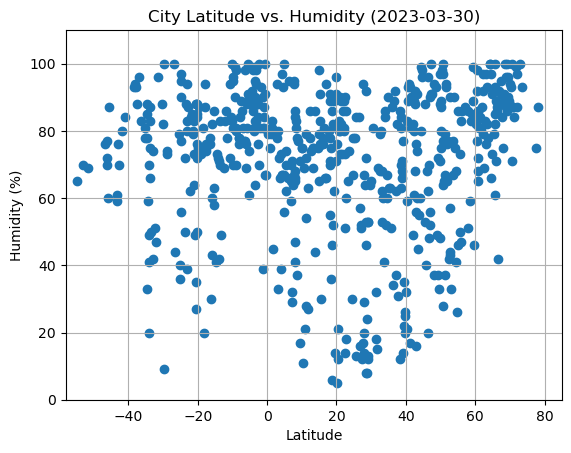

In [11]:
# Build the scatter plots for latitude vs. humidity
xaxis = city_data_df["Lat"]
yaxis = city_data_df["Humidity"]
plt.scatter(xaxis, yaxis)

# Incorporate the other graph properties
plt.grid()
plt.xlim(-58,85)
plt.ylim(0,110)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2023-03-30)")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

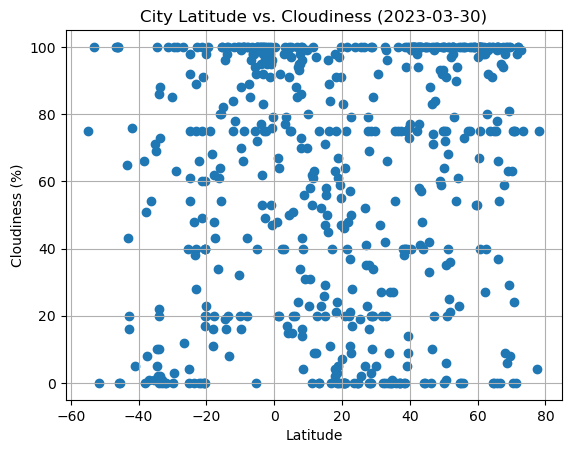

In [12]:
# Build the scatter plots for latitude vs. cloudiness
xaxis = city_data_df["Lat"]
yaxis = pd.to_numeric(city_data_df["Cloudiness"].astype(float))
plt.scatter(xaxis, yaxis)

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2023-03-30)")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

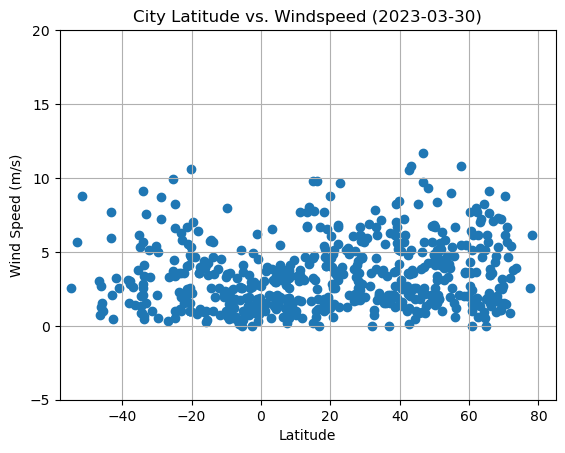

In [13]:
# Build the scatter plots for latitude vs. wind speed
xaxis = city_data_df["Lat"]
yaxis = city_data_df["Wind Speed"]
plt.scatter(xaxis, yaxis)

# Incorporate the other graph properties
plt.grid()
plt.xlim(-58,85)
plt.ylim(-5,20)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Windspeed (2023-03-30)")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
#Define a function to create Linear Regression plots
def linear_regression(x,y):  
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    regression = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a dictionary containing the regression parameters
    regression_dictionary = {'slope': slope, 'intercept': intercept, 'rvalue': rvalue, 'pvalue': pvalue, 'stderr': stderr, "regress_values" : regress_values, "regression": regression}
    
    return regression_dictionary


    

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]).astype(float) >= 0, :]
# Display sample data
northern_hemi_df.head()
#northern_hemi_df.count()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,jamestown,42.0970,-79.2353,6.77,82,75,2.68,US,1681728214
3,whitehorse,60.7161,-135.0538,-1.57,86,75,1.03,CA,1681728070
7,fairbanks,64.8378,-147.7164,-6.00,73,75,0.00,US,1681728220
10,tiksi,71.6872,128.8694,-15.76,99,98,0.84,RU,1681728222
11,anito,12.4497,125.2886,26.22,86,97,3.08,PH,1681728222


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]).astype(float) < 0, :]
# Display sample data
southern_hemi_df.head()
#southern_hemi_df.count()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,castro,-24.7911,-50.0119,18.56,95,61,3.38,BR,1681728215
2,punta arenas,-53.1500,-70.9167,4.06,70,100,5.66,CL,1681728215
4,flinders,-34.5833,150.8552,15.66,78,10,1.34,AU,1681728217
5,soe,-9.8607,124.2840,19.70,96,88,0.78,ID,1681728218
6,mataura,-46.1927,168.8643,11.38,72,100,1.30,NZ,1681728219


###  Temperature vs. Latitude Linear Regression Plot

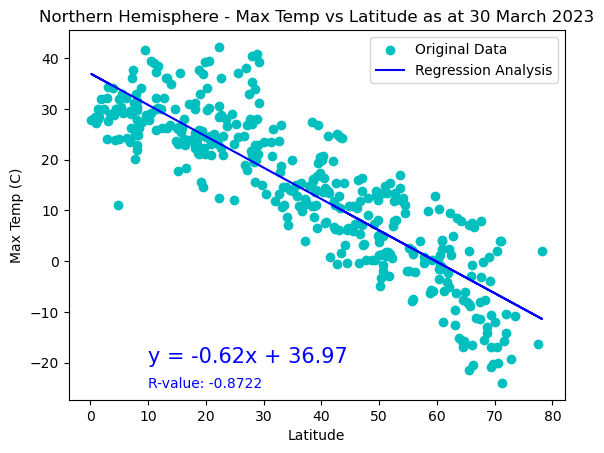

Discussion about linear relationships:
------------------------------------------------------------------------------
For the Northern Hemisphere the Max Temp vs. Latitude linear regression is: y = -0.62x + 36.97
The R value is: -0.8721600033063567, the regression details a strong correlation
The regression and the R-value details a relatively strong-negative correlation, this therefore implies that cities that lie further north of the equator have colder climates


<Figure size 640x480 with 0 Axes>

In [18]:
# Linear regression on Northern Hemisphere
x = pd.to_numeric(northern_hemi_df['Lat']).astype(float)
y = pd.to_numeric(northern_hemi_df['Max Temp']).astype(float)

#the equation
linear_regression(x,y)  

# Regression plot
regression_dict = linear_regression(x, y)
plt.scatter(x,y, color = "c", label = "Original Data")
plt.plot(x,regression_dict['regress_values'], color="b", label = "Regression Analysis")

# Regression format
plt.annotate(regression_dict['regression'],(10,-20),fontsize=15,color="b")
plt.annotate("R-value: {:.4f}".format(regression_dict['rvalue']), (10, -25), fontsize=10, color="b")
plt.title("Northern Hemisphere - Max Temp vs Latitude as at 30 March 2023")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.legend()
plt.show()

# Save the figure
plt.savefig("../output_data/Fig-NorthernHemisphere-MaxTempvsLatitudeRegression.png")

# Regression summary
print(f"Discussion about linear relationships:")
print(f"------------------------------------------------------------------------------")
print(f"For the Northern Hemisphere the Max Temp vs. Latitude linear regression is: {regression_dict['regression']}")
print(f"The R value is: {regression_dict['rvalue']}, the regression details a strong correlation")
print(f"The regression and the R-value details a relatively strong-negative correlation, this therefore implies that cities that lie further north of the equator have colder climates")

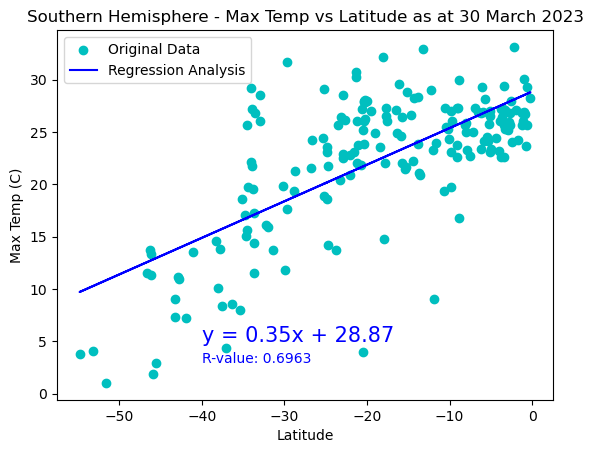

Discussion about linear relationships:
------------------------------------------------------------------------------
For the Southern Hemisphere the Max Temp vs. Latitude linear regression is: y = 0.35x + 28.87
The R value is: 0.6963279938309561, the regression details a medium correlation
The regression and the R-value details a relatively medium positive correlation, this therefore implies that generally cities that lie futher south of the equater have colder climates


<Figure size 640x480 with 0 Axes>

In [19]:
# Linear regression on Southern Hemisphere
x = pd.to_numeric(southern_hemi_df['Lat']).astype(float)
y = pd.to_numeric(southern_hemi_df['Max Temp']).astype(float)
# print(x)
# print(y)

#the equation
linear_regression(x, y)

# Regression plot
regression_dict = linear_regression(x, y)
plt.scatter(x,y, color = "c", label = "Original Data")
plt.plot(x,regression_dict['regress_values'], color="b", label = "Regression Analysis")

# Regression format
plt.annotate(regression_dict['regression'],(-40,5),fontsize=15,color="b")
plt.annotate("R-value: {:.4f}".format(regression_dict['rvalue']), (-40,3), fontsize=10, color="b")
plt.title("Southern Hemisphere - Max Temp vs Latitude as at 30 March 2023")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.legend()
plt.show()

# Save the figure
plt.savefig("../output_data/Fig-SouthernHemisphere-MaxTempvsLatitudeRegression.png")
# Regression summary
print(f"Discussion about linear relationships:")
print(f"------------------------------------------------------------------------------")
print(f"For the Southern Hemisphere the Max Temp vs. Latitude linear regression is: {regression_dict['regression']}")
print(f"The R value is: {regression_dict['rvalue']}, the regression details a medium correlation")
print(f"The regression and the R-value details a relatively medium positive correlation, this therefore implies that generally cities that lie futher south of the equater have colder climates")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

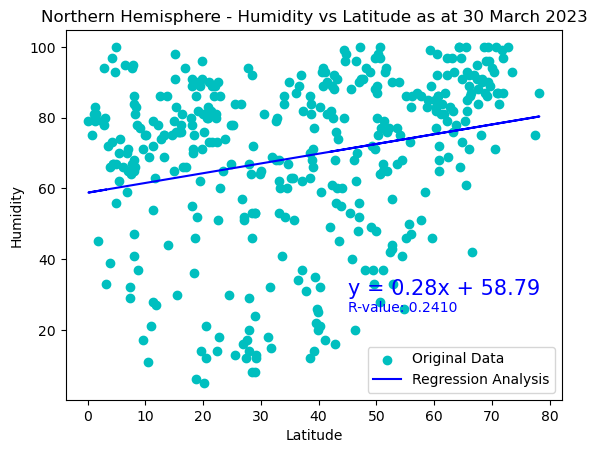

Discussion about linear relationships:
------------------------------------------------------------------------------
For the Northern Hemisphere the Humidity vs. Latitude linear regression is: y = 0.28x + 58.79
The R value is: 0.2410072752254982, the regression details a weak correlation
The regression and the R-value details a relatively weak positive correlation, therefore implying that regardless of how far cities lie north of the equater humidity remains relatively unaffected


<Figure size 640x480 with 0 Axes>

In [21]:
# Northern Hemisphere
x = pd.to_numeric(northern_hemi_df['Lat']).astype(float)
y = pd.to_numeric(northern_hemi_df['Humidity']).astype(float)

#the equation
linear_regression(x, y)

# Regression plot
regression_dict = linear_regression(x, y)
plt.scatter(x,y, color = "c", label = "Original Data")
plt.plot(x,regression_dict['regress_values'], color="b", label = "Regression Analysis")

# Regression format
#regression format
plt.annotate(regression_dict['regression'],(45,30),fontsize=15,color="b")
plt.annotate("R-value: {:.4f}".format(regression_dict['rvalue']), (45, 25), fontsize=10, color="b")
plt.title("Northern Hemisphere - Humidity vs Latitude as at 30 March 2023")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.legend()
plt.show()

# Save the figure
plt.savefig("../output_data/Fig-NorthernHemisphere-HumidityvsLatitudeRegression.png")

#summary
print(f"Discussion about linear relationships:")
print(f"------------------------------------------------------------------------------")
print(f"For the Northern Hemisphere the Humidity vs. Latitude linear regression is: {regression_dict['regression']}")
print(f"The R value is: {regression_dict['rvalue']}, the regression details a weak correlation")
print(f"The regression and the R-value details a relatively weak positive correlation, therefore implying that regardless of how far cities lie north of the equater humidity remains relatively unaffected")


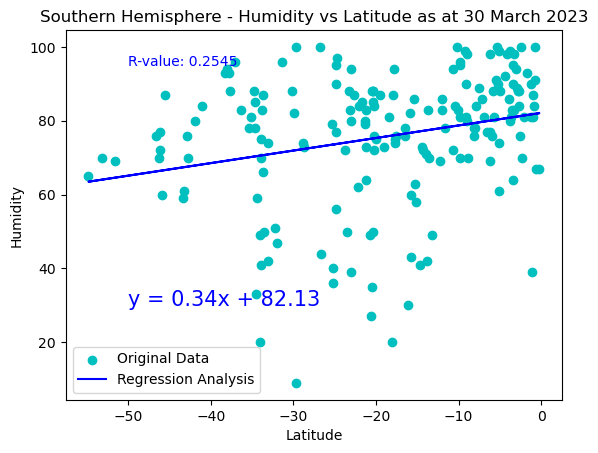

Discussion about linear relationships:
------------------------------------------------------------------------------
For the Southern Hemisphere the Humidity vs. Latitude linear regression is: y = 0.34x + 82.13
The R value is: 0.25445481692919036, the regression details a weak correlation
The regression and the R-value details a relatively weak positive correlation, this therefore implies that cities that lie futher south of the equater generally have lower levels of humidity


<Figure size 640x480 with 0 Axes>

In [23]:
# Southern Hemisphere
x = pd.to_numeric(southern_hemi_df['Lat']).astype(float)
y = pd.to_numeric(southern_hemi_df['Humidity']).astype(float)

#the equation
linear_regression(x, y)

# Regression plot
regression_dict = linear_regression(x, y)
plt.scatter(x,y, color = "c", label = "Original Data")
plt.plot(x,regression_dict['regress_values'], color="b", label = "Regression Analysis")
plt.legend

#regression format
plt.annotate(regression_dict['regression'],(-50,30),fontsize=15,color="b")
plt.annotate("R-value: {:.4f}".format(regression_dict['rvalue']), (-50,95), fontsize=10, color="b")
plt.title("Southern Hemisphere - Humidity vs Latitude as at 30 March 2023")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.legend()
plt.show()

# Save the figure
plt.savefig("../output_data/Fig-SouthernHemisphere-HumidityvsLatitudeRegression.png")

#summary
print(f"Discussion about linear relationships:")
print(f"------------------------------------------------------------------------------")
print(f"For the Southern Hemisphere the Humidity vs. Latitude linear regression is: {regression_dict['regression']}")
print(f"The R value is: {regression_dict['rvalue']}, the regression details a weak correlation")
print(f"The regression and the R-value details a relatively weak positive correlation, this therefore implies that cities that lie futher south of the equater generally have lower levels of humidity")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

/var/folders/97/1pwhdmm972qflw4pgzzsqdwr0000gn/T/ipykernel_84260/2347345944.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x,regression_dict["regress_values"],"r-", color="b", label = "Regression Analysis")


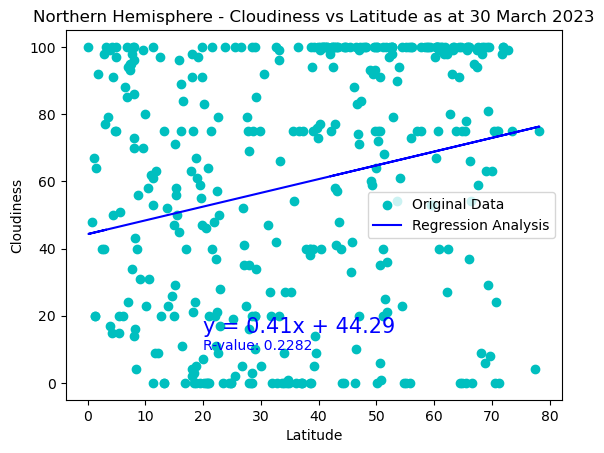

Discussion about linear relationships:
------------------------------------------------------------------------------
For the Northern Hemisphere the 'Cloudiness' vs. Latitude linear regression is: y = 0.41x + 44.29
The R value is: 0.22816988184438353, the regression details a very weak correlation
The regression and the R-value details a very weak positive correlation, therefore implying that regardless of how far cities lie north of the equater 'Cloudiness' remains relatively unaffected


<Figure size 640x480 with 0 Axes>

In [24]:
# Northern Hemisphere
x = pd.to_numeric(northern_hemi_df['Lat']).astype(float)
y = pd.to_numeric(northern_hemi_df['Cloudiness']).astype(float)

#the equation
linear_regression(x, y)

# Regression plot
regression_dict = linear_regression(x, y)
plt.scatter(x,y, color = "c", label = "Original Data")
plt.plot(x,regression_dict["regress_values"],"r-", color="b", label = "Regression Analysis")
plt.legend()

#regression format
plt.annotate(regression_dict["regression"],(20,15),fontsize=15,color="b")
plt.annotate("R-value: {:.4f}".format(regression_dict["rvalue"]), (20, 10), fontsize=10, color="b")
plt.title("Northern Hemisphere - Cloudiness vs Latitude as at 30 March 2023")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

# Save the figure
plt.savefig("../output_data/Fig-NorthernHemisphere-CloudinessvsLatitudeRegression.png")

#summary
print(f"Discussion about linear relationships:")
print(f"------------------------------------------------------------------------------")

print(f"For the Northern Hemisphere the 'Cloudiness' vs. Latitude linear regression is: {regression_dict['regression']}")
print(f"The R value is: {regression_dict['rvalue']}, the regression details a very weak correlation")
print(f"The regression and the R-value details a very weak positive correlation, therefore implying that regardless of how far cities lie north of the equater 'Cloudiness' remains relatively unaffected")

/var/folders/97/1pwhdmm972qflw4pgzzsqdwr0000gn/T/ipykernel_84260/2974466278.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x,regression_dict["regress_values"],"r-", color="b", label = "Regression Analysis")


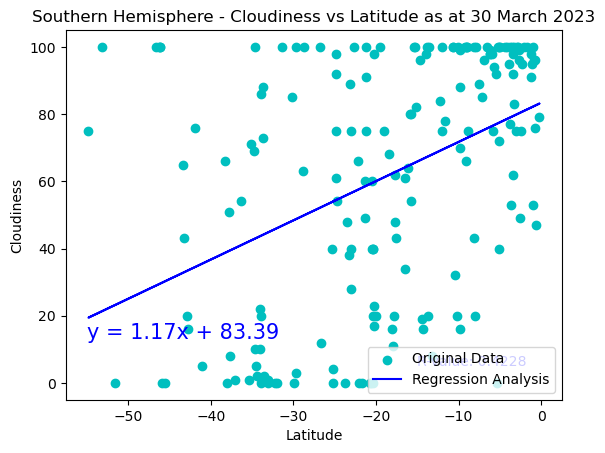

Discussion about linear relationships:
------------------------------------------------------------------------------
For the Southern Hemisphere the 'Cloudiness' vs. Latitude linear regression is: y = 1.17x + 83.39
The R value is: 0.4227575309328357, the regression details a very weak correlation
The regression and the R-value details a very weak positive correlation, therefore implying that regardless of how far cities lie south of the equater 'Cloudiness' remains relatively unaffected


<Figure size 640x480 with 0 Axes>

In [25]:
# Southern Hemisphere
x = pd.to_numeric(southern_hemi_df['Lat']).astype(float)
y = pd.to_numeric(southern_hemi_df['Cloudiness']).astype(float)

#the equation
linear_regression(x, y)

# Regression plot
regression_dict = linear_regression(x, y)
plt.scatter(x,y, color = "c", label = "Original Data")
plt.plot(x,regression_dict["regress_values"],"r-", color="b", label = "Regression Analysis")
plt.legend()

#regression format
plt.annotate(regression_dict["regression"],(-55,13),fontsize=15,color="b")
plt.annotate("R-value: {:.4f}".format(regression_dict["rvalue"]), (-15, 5), fontsize=10, color="b")
plt.title("Southern Hemisphere - Cloudiness vs Latitude as at 30 March 2023")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

# Save the figure
plt.savefig("../output_data/Fig-SouthernHemisphere-CloudinessvsLatitudeRegression.png")

#summary
print(f"Discussion about linear relationships:")
print(f"------------------------------------------------------------------------------")

print(f"For the Southern Hemisphere the 'Cloudiness' vs. Latitude linear regression is: {regression_dict['regression']}")
print(f"The R value is: {regression_dict['rvalue']}, the regression details a very weak correlation")
print(f"The regression and the R-value details a very weak positive correlation, therefore implying that regardless of how far cities lie south of the equater 'Cloudiness' remains relatively unaffected")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

/var/folders/97/1pwhdmm972qflw4pgzzsqdwr0000gn/T/ipykernel_84260/1032225722.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x,regression_dict["regress_values"],"r-", color="b", label = "Regression Analysis")


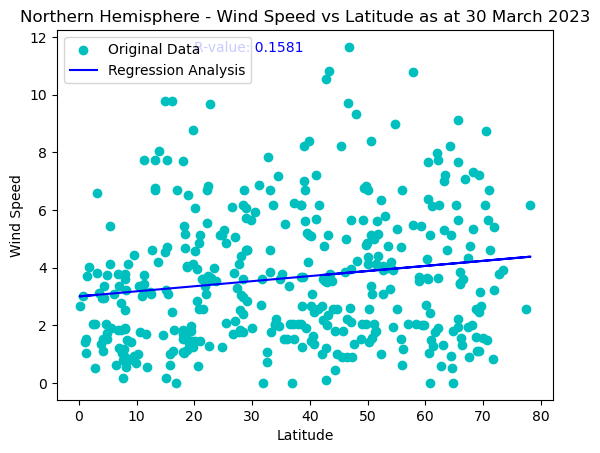

Discussion about linear relationships:
------------------------------------------------------------------------------
For the Northern Hemisphere the 'Wind Speed' vs. Latitude linear regression is: y = 0.02x + 3.0
The R value is: 0.15810333064002677, the regression details a very weak correlation
The regression and the R-value details a very weak positive correlation, therefore implying that regardless of how far cities lie north of the equater 'Cloudiness' remains relatively unaffected


<Figure size 640x480 with 0 Axes>

In [26]:
# Northern Hemisphere
x = pd.to_numeric(northern_hemi_df['Lat']).astype(float)
y = pd.to_numeric(northern_hemi_df['Wind Speed']).astype(float)

#the equation
linear_regression(x, y)

# Regression plot
regression_dict = linear_regression(x, y)
plt.scatter(x,y, color = "c", label = "Original Data")
plt.plot(x,regression_dict["regress_values"],"r-", color="b", label = "Regression Analysis")
plt.legend()

#regression format
plt.annotate(regression_dict["regression"],(20,13),fontsize=15,color="b")
plt.annotate("R-value: {:.4f}".format(regression_dict["rvalue"]), (20, 11.5), fontsize=10, color="b")
plt.title("Northern Hemisphere - Wind Speed vs Latitude as at 30 March 2023")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

# Save the figure
plt.savefig("../output_data/Fig-NorthernHemisphere-WindSpeedvsLatitudeRegression.png")

#summary
print(f"Discussion about linear relationships:")
print(f"------------------------------------------------------------------------------")
print(f"For the Northern Hemisphere the 'Wind Speed' vs. Latitude linear regression is: {regression_dict['regression']}")
print(f"The R value is: {regression_dict['rvalue']}, the regression details a very weak correlation")
print(f"The regression and the R-value details a very weak positive correlation, therefore implying that regardless of how far cities lie north of the equater 'Cloudiness' remains relatively unaffected")


/var/folders/97/1pwhdmm972qflw4pgzzsqdwr0000gn/T/ipykernel_84260/775893528.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x,regression_dict["regress_values"],"r-", color="b", label = "Regression Analysis")


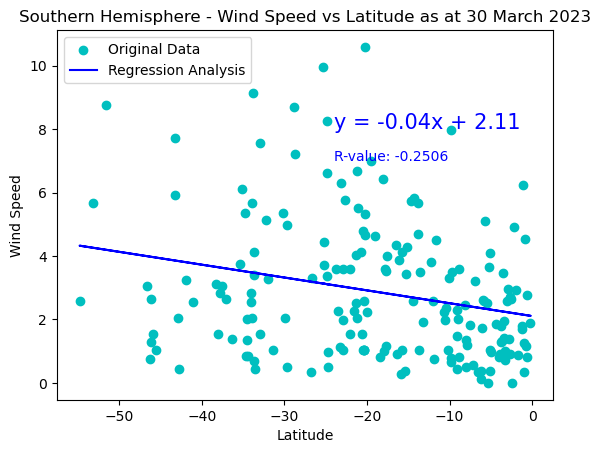

Discussion about linear relationships:
------------------------------------------------------------------------------
For the Southern Hemisphere the 'Wind Speed' vs. Latitude linear regression is: y = -0.04x + 2.11
The R value is: -0.25055442945033024, the regression details a weak correlation
The regression and the R-value details a relatively weak negative correlation, therefore implying that regardless of how far cities lie south of the equater 'Cloudiness' remains relatively unaffected


<Figure size 640x480 with 0 Axes>

In [27]:
# Southern Hemisphere
x = pd.to_numeric(southern_hemi_df['Lat']).astype(float)
y = pd.to_numeric(southern_hemi_df['Wind Speed']).astype(float)

#the equation
linear_regression(x, y)

# Regression plot
regression_dict = linear_regression(x, y)
plt.scatter(x,y, color = "c", label = "Original Data")
plt.plot(x,regression_dict["regress_values"],"r-", color="b", label = "Regression Analysis")
plt.legend()

#regression format
plt.annotate(regression_dict["regression"],(-24,8),fontsize=15,color="b")
plt.annotate("R-value: {:.4f}".format(regression_dict["rvalue"]), (-24, 7), fontsize=10, color="b")
plt.title("Southern Hemisphere - Wind Speed vs Latitude as at 30 March 2023")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

# Save the figure
plt.savefig("../output_data/Fig-SouthernHemisphere-WindSpeedvsLatitudeRegression.png")

#summary
print(f"Discussion about linear relationships:")
print(f"------------------------------------------------------------------------------")
print(f"For the Southern Hemisphere the 'Wind Speed' vs. Latitude linear regression is: {regression_dict['regression']}")
print(f"The R value is: {regression_dict['rvalue']}, the regression details a weak correlation")
print(f"The regression and the R-value details a relatively weak negative correlation, therefore implying that regardless of how far cities lie south of the equater 'Cloudiness' remains relatively unaffected")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [28]:
#For the Southern Hemisphere the 'Wind Speed' vs. Latitude linear regression is: y = -0.04x + 2.11
#The R value is: -0.25055442945033024, the regression details a weak correlation
#The regression and the R-value details a relatively weak negative correlation, therefore implying that regardless of how far cities lie south of the equater 'Cloudiness' remains relatively unaffected